In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://www.kaggle.com/datasets/mohithsairamreddy/salary-data
data1 = pd.read_csv(r"C:\Users\Sona Jomon\python_program\sal_predict\Salary_Data.csv")

In [3]:
data1.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [4]:
data1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
data1.shape

(6704, 6)

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [7]:
data1.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6699,False,False,False,False,False,False
6700,False,False,False,False,False,False
6701,False,False,False,False,False,False
6702,False,False,False,False,False,False


In [8]:
#check for missing values 
print(data1.isna().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [9]:
#check for duplicates
print(f"Duplicated rows:  {data1.duplicated().sum()}")

Duplicated rows:  4912


In [10]:
#check the data types
data1.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [11]:
#handle the missing values -- numeric
data1.fillna({'Age' : data1['Age'].mean()}, inplace = True)
data1.fillna({'Years of Experience' : data1['Years of Experience'].median()}, inplace = True)
data1.fillna({'Salary' : data1['Salary'].median()}, inplace = True)

In [12]:
print(data1.isna().sum())

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


In [13]:
#handle missing values  --- categorical values 
#fill with most frequent value
data1.fillna({'Gender' : data1['Gender'].mode()[0]}, inplace = True)

#preserve information about missingness
data1.fillna({'Education Level': 'Not Specified'}, inplace = True)
data1.fillna({'Job Title': 'Unspecified'}, inplace = True)

In [14]:
import pandas as pd
import numpy as np

# Check for complete duplicate rows
print(f"Total duplicate rows: {data1.duplicated().sum()}")
print(f"Percentage of duplicates: {(data1.duplicated().sum() / len(data1)) * 100:.2f}%")

# View duplicate rows
duplicates = data1[data1.duplicated()]
print(f"\nFirst 10 duplicate rows:")
print(duplicates.head(10))

# Check duplicates keeping first occurrence
print(f"\nDuplicates (excluding first occurrence): {data1.duplicated(keep='first').sum()}")

Total duplicate rows: 4912
Percentage of duplicates: 73.27%

First 10 duplicate rows:
      Age  Gender Education Level                              Job Title  \
195  28.0    Male      Bachelor's                Junior Business Analyst   
250  30.0  Female      Bachelor's           Junior Marketing Coordinator   
251  38.0    Male        Master's                   Senior IT Consultant   
252  45.0  Female             PhD                Senior Product Designer   
253  28.0    Male      Bachelor's  Junior Business Development Associate   
254  35.0  Female      Bachelor's               Senior Marketing Analyst   
255  44.0    Male      Bachelor's               Senior Software Engineer   
256  34.0  Female        Master's               Senior Financial Advisor   
257  35.0    Male      Bachelor's             Senior Project Coordinator   
258  50.0  Female             PhD                 Director of Operations   

     Years of Experience    Salary  
195                  2.0   40000.0  
250

In [15]:
# Simple removal - keep first occurrence
df = data1.drop_duplicates()
print(f"Removed {len(data1) - len(df)} exact duplicates")


Removed 4912 exact duplicates


In [16]:
df.shape

(1792, 6)

In [17]:
df['Years of Experience'].value_counts()

Years of Experience
2.0     151
3.0     142
1.0     126
4.0     124
6.0     106
8.0     106
5.0     104
7.0      94
9.0      85
12.0     80
11.0     72
10.0     66
14.0     63
13.0     62
16.0     59
15.0     47
18.0     46
19.0     44
20.0     31
21.0     27
22.0     23
17.0     22
0.0      20
23.0     17
25.0     14
1.5      11
24.0      9
28.0      8
29.0      6
26.0      5
30.0      5
27.0      5
31.0      4
32.0      3
33.0      3
0.5       1
34.0      1
Name: count, dtype: int64

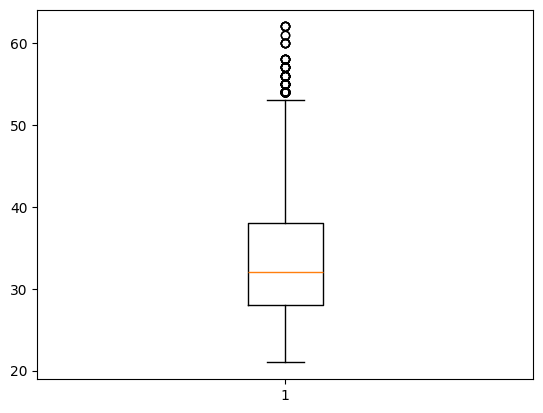

In [18]:
plt.boxplot(data1['Age'])
plt.show()

In [19]:
df = df[(df['Age'] < 60)]

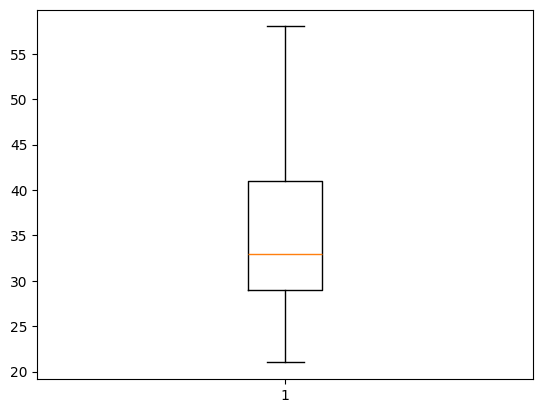

In [20]:
plt.boxplot(df['Age'])
plt.show()

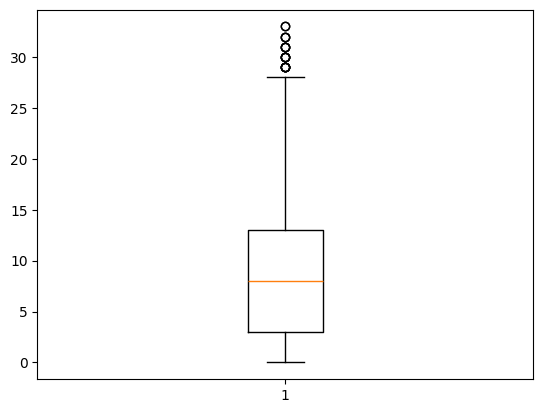

In [21]:
plt.boxplot(df['Years of Experience'])
plt.show()

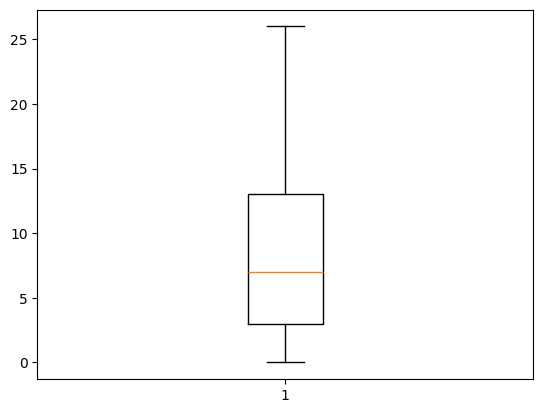

In [22]:
df = df[(df['Years of Experience'] < 27)]
plt.boxplot(df['Years of Experience'])
plt.show()

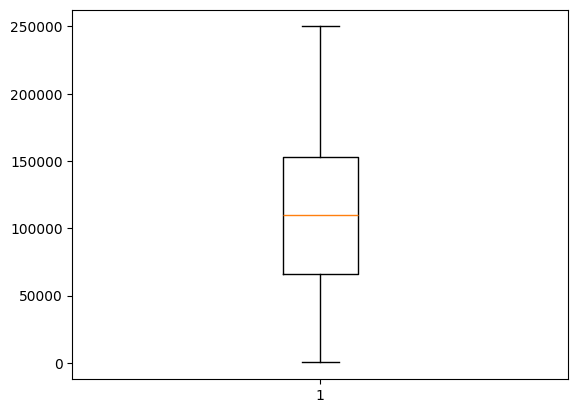

In [23]:
plt.boxplot(df['Salary'])
plt.show()

In [24]:
print(list(df.columns))


['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']


In [25]:
#splitting the data 
x = df.drop(columns = ['Salary'])
y = df['Salary']

In [26]:
y

0        90000.0
1        65000.0
2       150000.0
3        60000.0
4       200000.0
          ...   
6623    150000.0
6624     40000.0
6625     80000.0
6628     90000.0
6631     70000.0
Name: Salary, Length: 1753, dtype: float64

In [27]:
# # Use one-hot encoding for categorical columns
import joblib
df = pd.get_dummies(df, columns=['Gender', 'Education Level', 'Job Title'], drop_first=True)
# After get_dummies()
x = pd.get_dummies(df.drop(columns=['Salary']), drop_first=True)
y = df['Salary']

# Save column names used during training
joblib.dump(x.columns.tolist(), "feature_columns.pkl")

['feature_columns.pkl']

In [28]:
#scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.2972973 , 0.19230769, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.18918919, 0.11538462, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64864865, 0.57692308, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32432432, 0.30769231, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43243243, 0.26923077, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24324324, 0.19230769, 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(1753, 204))

In [29]:
#train_test_split
#stratify=y only works when y is categorical
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 4)

In [30]:
xtrain

array([[0.16216216, 0.15384615, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24324324, 0.30769231, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.24324324, 0.19230769, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.18918919, 0.23076923, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13513514, 0.05769231, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08108108, 0.03846154, 1.        , ..., 0.        , 0.        ,
        0.        ]], shape=(1402, 204))

In [31]:
#multiple linear regression
from sklearn import linear_model
mlr = linear_model.LinearRegression()
mlr.fit(xtrain, ytrain)

#prediction
predict1 = mlr.predict(xtest)

#evaluation
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((predict1 - ytest) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlr.score(xtest, ytest))

Mean Squared Error (MSE) : 359989169.97
Variance score: 0.85


In [32]:
#random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators =100, random_state = 42)
rf.fit(xtrain, ytrain)

predict2 = rf.predict(xtest)

mae = mean_absolute_error(ytest, predict2)
r2 = r2_score(ytest, predict2)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 9686.053477183865
R² Score: 0.9191652396585481


In [33]:
#SVR : Support Vector Regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
# SVR requires feature scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()
xtrain_scaled = scaler_x.fit_transform(xtrain)
xtest_scaled = scaler_x.transform(xtest)
ytrain_scaled = scaler_y.fit_transform(ytrain.values.reshape(-1, 1)).ravel()
#training
svr = SVR(kernel='rbf')  
svr.fit(xtrain_scaled, ytrain_scaled)

# Predict
scaled_predict= svr.predict(xtest_scaled)

# Inverse transform the scaled predictions
predict3 = scaler_y.inverse_transform(scaled_predict.reshape(-1, 1))
# Evaluate
mae = mean_absolute_error(ytest, predict3)
r2 = r2_score(ytest, predict3)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 14296.83
R² Score: 0.82


In [34]:
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(xtrain, ytrain)
predict4 = gb.predict(xtest)
# Evaluate
mae = mean_absolute_error(ytest, predict4)
r2 = r2_score(ytest, predict4)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 12968.17
R² Score: 0.88


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVM": SVR(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results[name] = (mae, r2)
    print(f"{name}: MAE = {mae:.4f}, R² = {r2:.4f}")

# Select best model: maximize R², minimize MAE
best_model_name = max(results, key=lambda x: (results[x][1], -results[x][0]))
best_model = models[best_model_name]

print(f"\n Best Model: {best_model_name}")
print(f"   → MAE: {results[best_model_name][0]:.4f}, R²: {results[best_model_name][1]:.4f}")

# Save the best model
joblib.dump(best_model, "best_regression_model.pkl")
print("Saved best regression model as best_regression_model.pkl")


Linear Regression: MAE = 14618.7099, R² = 0.8503
Random Forest: MAE = 10383.9187, R² = 0.8985
SVM: MAE = 43740.6147, R² = 0.0010
Gradient Boosting: MAE = 12753.2492, R² = 0.8804

 Best Model: Random Forest
   → MAE: 10383.9187, R²: 0.8985
Saved best regression model as best_regression_model.pkl


In [38]:
import joblib

# Save model and scaler
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(mlr, 'best_model.pkl')


['best_model.pkl']

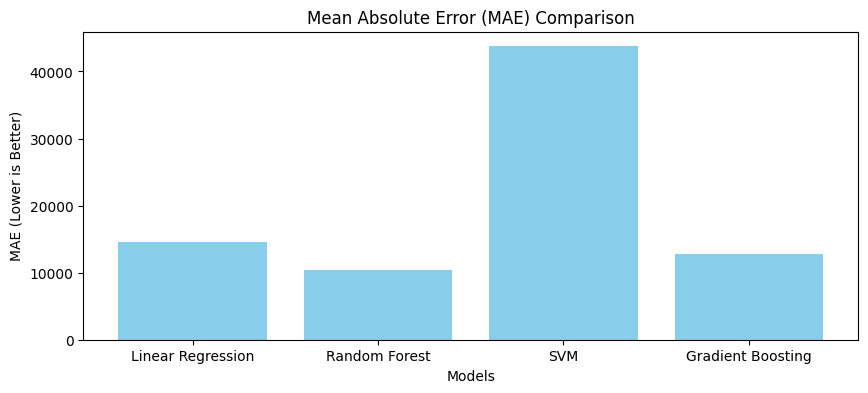

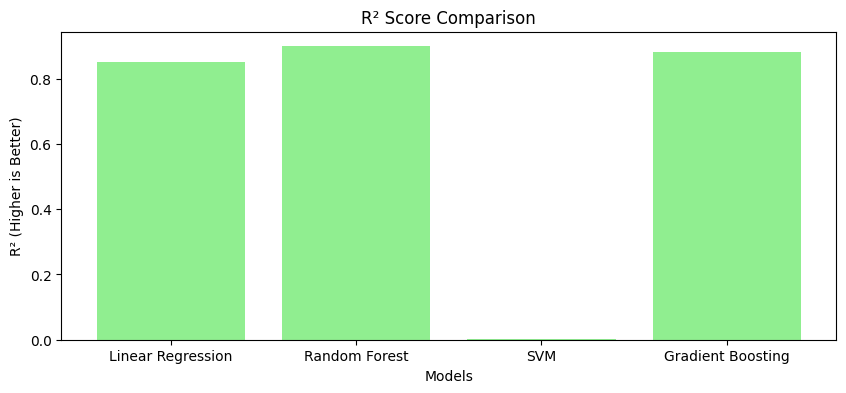

In [37]:
import matplotlib.pyplot as plt

# Separate metrics
model_names = list(results.keys())
mae_scores = [results[m][0] for m in model_names]
r2_scores = [results[m][1] for m in model_names]

# MAE Plot
plt.figure(figsize=(10, 4))
plt.bar(model_names, mae_scores, color='skyblue')
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE (Lower is Better)")
plt.xlabel("Models")
plt.show()

# R² Plot
plt.figure(figsize=(10, 4))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.title("R² Score Comparison")
plt.ylabel("R² (Higher is Better)")
plt.xlabel("Models")
plt.show()
